In [ ]:
! ls drive/MyDrive/

 acc-valacc-ResNet50.png	   ResNet50-stats.csv
 acc-valacc-VGG16.png		   ResNet50-summary.txt
 acc-valacc-VGG19.png		   ResNet50.zip
 Alzheimers			  'VGG16 (1).zip'
'Colab Notebooks'		   VGG16.h5
 evaluation.py			   VGG16-stats.csv
 __init__.py			   VGG16-summary.txt
 loss_valloss-ResNet50.png	  'VGG16&VGG19.ipynb'
 loss_valloss-VGG16.png		   VGG16.zip
 loss_valloss-VGG19.png		  'VGG19 (1).zip'
 plant-data			   VGG19.h5
'plant-data (1)'		   VGG19-stats.csv
 plant_disease_InceptionV3.ipynb   VGG19-summary.txt
 __pycache__			   VGG19.zip
 ResNet50.h5			   yield_gen.py


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# importing pipelines 

from drive.MyDrive.evaluation import * 
from drive.MyDrive.yield_gen import *

In [ ]:
a_train, a_valid, a_test = generator("with-aug",'colab')

Colab Paths Returned
Found 1322 images belonging to 3 classes.
Found 105 images belonging to 3 classes.
Found 105 images belonging to 3 classes.


In [ ]:
# imports required 
import pandas as pd 
from tensorflow.keras.applications import Xception
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Activation, Dropout

In [ ]:
conv_base = Xception(input_shape=a_train.image_shape, include_top=False, weights='imagenet')


83689472/83683744 [==============================] - 0s 0us/step


In [ ]:
conv_base.trainable


True

In [ ]:
# freezing weights 
conv_base.trainable= False 

In [ ]:
conv_base.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 127, 127, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 127, 127, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 127, 127, 32) 0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [ ]:
model = Sequential()

model.add(conv_base)

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dropout(0.4))

model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 8, 8, 2048)        20861480  
_________________________________________________________________
flatten (Flatten)            (None, 131072)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               16777344  
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 387       
Total params: 37,639,211
Trainable params: 16,777,731
Non-trainable params: 20,861,480
_________________________________________________________________


In [ ]:
# setting callbacks 
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(patience=3)
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
# Fitting Augmentated Generator
import time

start = time.perf_counter()

perf = model.fit_generator(a_train, epochs=15, callbacks=[early_stop],validation_data=a_valid)

elapsed = time.perf_counter()- start 

print('Elapsed {}'.format(elapsed/60))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
42/42 [==============================] - 838s 19s/step - loss: 4.2528 - accuracy: 0.7398 - val_loss: 0.5612 - val_accuracy: 0.8381
Epoch 2/15
42/42 [==============================] - 203s 5s/step - loss: 0.3819 - accuracy: 0.8752 - val_loss: 0.3561 - val_accuracy: 0.8571
Epoch 3/15
42/42 [==============================] - 203s 5s/step - loss: 0.3150 - accuracy: 0.8903 - val_loss: 0.3526 - val_accuracy: 0.9048
Epoch 4/15
42/42 [==============================] - 202s 5s/step - loss: 0.2597 - accuracy: 0.9077 - val_loss: 0.3344 - val_accuracy: 0.8762
Epoch 5/15
42/42 [==============================] - 202s 5s/step - loss: 0.2434 - accuracy: 0.9100 - val_loss: 0.3014 - val_accuracy: 0.8952
Epoch 6/15
42/42 [==============================] - 201s 5s/step - loss: 0.2400 - accuracy: 0.9130 - val_loss: 0.3845 - val_accuracy: 0.8667
Epoch 7/15
42/42 [==============================] - 200s 5s/step - loss: 0.2582 - accuracy: 0.9039 - val_loss: 0.3207 - val_accuracy: 0.8762
Epoch 8/15
4

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1973: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Validation Accuracy - 91.43%
validation loss - 0.32
Test Accuracy - 93.33%
Test loss - 0.22
preserving records


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Xception Records Created


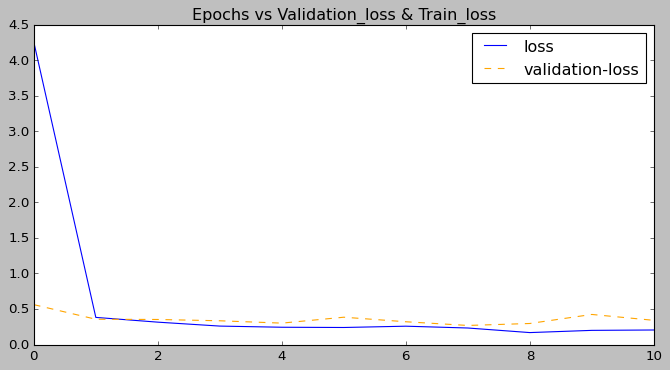

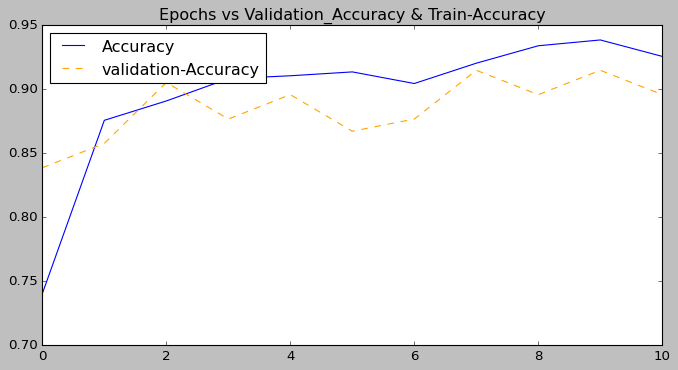

In [ ]:
histdata = pd.DataFrame(perf.history)
evaluate_model('Xception', model, a_valid, a_test, histdata, elapsed)

In [ ]:
from google.colab import files
files.download('/content/drive/MyDrive/Xception.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>